# **E-Commerce Shopper's Behaviour Understanding**

**Objective:**  Design a machine learning classification system to understand customer's shopping behaviours and predict shopper's intention (Purchase or not) based on the given features.

**Import Library**

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# interact with the underlying operating system.
import os

# Replace missing values
from sklearn.impute import SimpleImputer 
# Transform features by scaling
from sklearn.preprocessing import MinMaxScaler

# Model Building
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV


**Import Data**

In [2]:
# defining file paths
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

/kaggle/input/ecommerceshoppersbehaviourunderstanding/test_data_v2.csv
/kaggle/input/ecommerceshoppersbehaviourunderstanding/train_data_v2.csv
/kaggle/input/ecommerceshoppersbehaviourunderstanding/sample.csv


In [3]:
# loading data
train_data = pd.read_csv('/kaggle/input/ecommerceshoppersbehaviourunderstanding/train_data_v2.csv')
test_data = pd.read_csv('/kaggle/input/ecommerceshoppersbehaviourunderstanding/test_data_v2.csv')

# **Exploratory Data Analysis**

**View Data**

In [4]:


train_data # training data
test_data  # testing data

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.000000,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.000000,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.000000,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,0.0,0.000000,0.0,0.0,7.0,208.000000,0.000000,0.028571,0.0,0.0,...,4.0,1.0,1.0,5.0,Returning_Visitor,Not Specified,Required,Graduate,Other,1.0
6595,0.0,0.000000,3.0,44.0,179.0,1738.472529,0.000027,0.025998,0.0,0.0,...,2.0,4.0,9.0,11.0,Returning_Visitor,Male,Required,Not Specified,Other,0.0
6596,5.0,99.166667,1.0,27.0,33.0,NaN,0.002778,0.009127,0.0,0.6,...,8.0,5.0,1.0,2.0,Returning_Visitor,Female,Required,Graduate,Married,0.0
6597,0.0,0.000000,0.0,0.0,3.0,9.000000,0.066667,0.133333,0.0,0.0,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Deny,Diploma,Other,1.0


**Information**

In [5]:


train_data.info() # training data
test_data.info() # testing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

**Columns**

In [6]:


train_data.columns # Displays all columns in training data
test_data.columns # Displays all columns in testing data

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object')

**Summary Statistics**

In [7]:


train_data.describe()  # description regarding training data
test_data.describe()   # description regarding testing data  

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,6548.000000,6544.000000,6543.000000,6524.000000,6541.000000,6536.000000,6533.000000,6548.000000,6554.000000,6554.000000,6537.000000,6541.000000,6552.000000,6531.000000,6541.000000
mean,2.283293,76.994609,0.494727,32.907760,30.742088,1151.231143,0.022392,0.043874,4.982108,0.064297,2.134006,2.357743,3.184676,4.041954,0.227947
std,3.345387,168.679695,1.272524,134.683314,43.539549,1917.250309,0.048374,0.048290,17.635847,0.202678,0.909340,1.721375,2.407328,4.027747,0.419540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,172.127778,0.000000,0.014543,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,4.875000,0.000000,0.000000,17.000000,570.341614,0.003165,0.026458,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.000000,0.000000,0.000000,37.000000,1425.750000,0.017778,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,26.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


**Shape**

In [8]:


train_data.shape  # displays shape of training data
test_data.shape   # displays shape of testing data

(6599, 21)

**Missing Values**

In [9]:
# checking for missing values in training and test data

train_data.isna().sum()
test_data.isna().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
Month_SeasonalPurchase             58
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
CustomerType                       88
Gender                             64
Cookies Setting                    62
Education                          69
Marital Status                     47
WeekendPurchase                    58
dtype: int64

**Categories**

In [10]:
# checking for unique categories in training and test data

train_data.nunique()
test_data.nunique()

HomePage                             26
HomePage_Duration                  1745
LandingPage                          15
LandingPage_Duration                667
ProductDescriptionPage              242
ProductDescriptionPage_Duration    4536
GoogleMetric:Bounce Rates          1056
GoogleMetric:Exit Rates            2390
GoogleMetric:Page Values           1098
SeasonalPurchase                      6
Month_SeasonalPurchase               10
OS                                    8
SearchEngine                         13
Zone                                  9
Type of Traffic                      17
CustomerType                          3
Gender                                3
Cookies Setting                       3
Education                             4
Marital Status                        3
WeekendPurchase                       2
dtype: int64

**Correlation**

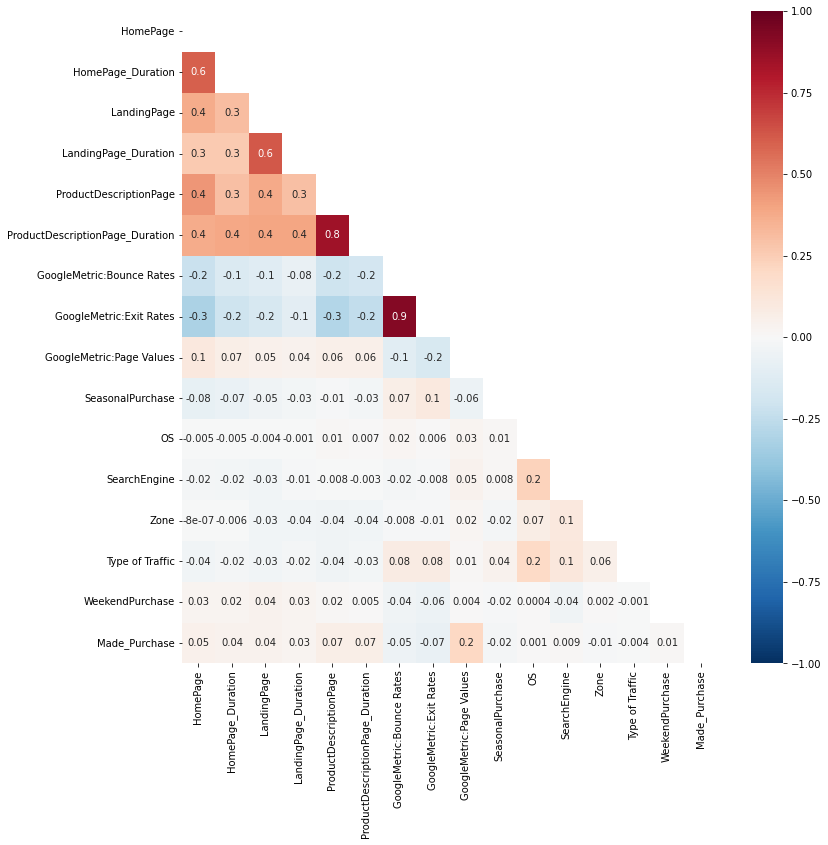

In [11]:
heatmap = np.triu(train_data.corr())
figure, axis = plt.subplots(figsize=(12,12))
sns.heatmap(train_data.corr(), annot=True, ax=axis, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=heatmap, cmap='RdBu_r')
plt.show()

**Page Metrics**

In [12]:
train_data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

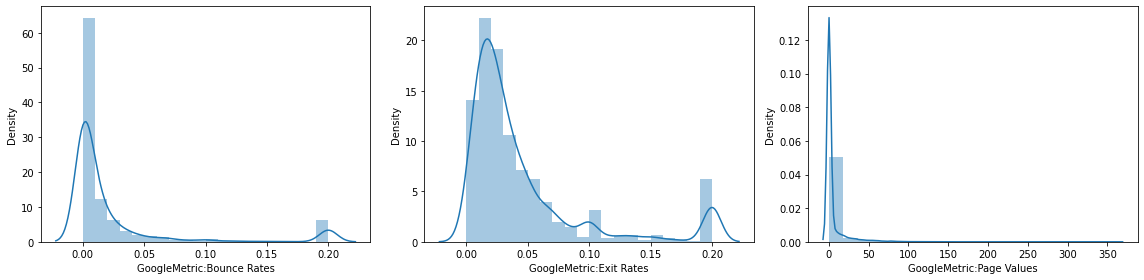

In [13]:
figure = plt.figure(figsize=(16, 4))

axis_1 = figure.add_subplot(1, 3, 1)
axis_2 = figure.add_subplot(1, 3, 2)
axis_3 = figure.add_subplot(1, 3, 3)

sns.distplot(train_data['GoogleMetric:Bounce Rates'], bins=20, ax=axis_1)
sns.distplot(train_data['GoogleMetric:Exit Rates'], bins=20, ax=axis_2)
sns.distplot(train_data['GoogleMetric:Page Values'], bins=20, ax=axis_3)

plt.tight_layout()
plt.show()

# **Data Preprocessing**

**One Hot Encoding**

In [14]:
# get all categorical columns
categorical_columns = ['Month_SeasonalPurchase','CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status']


categorical_encode_train = pd.get_dummies(train_data[categorical_columns])
categorical_encode_test = pd.get_dummies(test_data[categorical_columns])

# adding all the encoded columns to train data and test data
train_data = pd.concat([train_data, categorical_encode_train], axis=1)
test_data = pd.concat([test_data, categorical_encode_test], axis=1)

# dropping original categorical columns
train_data.drop(categorical_columns, axis=1, inplace=True)
test_data.drop(categorical_columns, axis=1, inplace=True)

**Imputation**

In [15]:
# Create a simple imputer object

imputer = SimpleImputer(strategy='median')

# imputing missing values of train data and test data using SimpleImputer
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

**Type Conversion**

In [16]:
# training data

# converting float value into int
train_data['HomePage']= train_data['HomePage'].apply(np.int64)
train_data['LandingPage']= train_data['LandingPage'].apply(np.int64)
train_data['ProductDescriptionPage']= train_data['ProductDescriptionPage'].apply(np.int64)

train_data['OS']= train_data['OS'].apply(np.int64)
train_data['SearchEngine']= train_data['SearchEngine'].apply(np.int64)
train_data['Zone']= train_data['Zone'].apply(np.int64)
train_data['Type of Traffic']= train_data['Type of Traffic'].apply(np.int64)
train_data['WeekendPurchase']= train_data['WeekendPurchase'].apply(bool)

In [17]:
# testing data

# converting float value into int
test_data['HomePage']= test_data['HomePage'].apply(np.int64)
test_data['LandingPage']= test_data['LandingPage'].apply(np.int64)
test_data['ProductDescriptionPage']= test_data['ProductDescriptionPage'].apply(np.int64)

test_data['OS']= test_data['OS'].apply(np.int64)
test_data['SearchEngine']= test_data['SearchEngine'].apply(np.int64)
test_data['Zone']= test_data['Zone'].apply(np.int64)
test_data['Type of Traffic']= test_data['Type of Traffic'].apply(np.int64)
test_data['WeekendPurchase']= test_data['WeekendPurchase'].apply(bool)

In [18]:
# info of train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  int64  
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  int64  
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  int64  
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  OS                               14731 non-null  int64  
 11  SearchEngine                     14731 non-null  int64  
 12  Zone              

In [19]:
# info of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6599 non-null   int64  
 1   HomePage_Duration                6599 non-null   float64
 2   LandingPage                      6599 non-null   int64  
 3   LandingPage_Duration             6599 non-null   float64
 4   ProductDescriptionPage           6599 non-null   int64  
 5   ProductDescriptionPage_Duration  6599 non-null   float64
 6   GoogleMetric:Bounce Rates        6599 non-null   float64
 7   GoogleMetric:Exit Rates          6599 non-null   float64
 8   GoogleMetric:Page Values         6599 non-null   float64
 9   SeasonalPurchase                 6599 non-null   float64
 10  OS                               6599 non-null   int64  
 11  SearchEngine                     6599 non-null   int64  
 12  Zone                

In [20]:
# getting all columns in training data
train_data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase', 'Made_Purchase',
       'Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
       'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
       'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
       'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
       'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep',
       'CustomerType_New_Visitor', 'CustomerType_Other',
       'CustomerType_Returning_Visitor', 'Gender_Female', 'Gender_Male',
       'Gender_Not Specified', 'Cookies Setting_ALL', 'Cookies Setting_Deny',
       'Cookies Setting_Required', 'Education_Diploma', 'Education_Graduate',
       'Education_Not

**Outlier Treatment**

In [21]:
outlier = ['HomePage_Duration','LandingPage_Duration','ProductDescriptionPage_Duration','GoogleMetric:Bounce Rates','GoogleMetric:Exit Rates','GoogleMetric:Page Values']
# train data
for i in outlier:
    # calculating Inter Quartile Range
    q1 = train_data[i].quantile(0.25)
    q3 = train_data[i].quantile(0.75)
    iqr = q3-q1
    # Setting the upper and lower limits
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    output_train_1 = train_data[(train_data[i]< lower_limit)].values
    output_train_2 = train_data[(train_data[i]> upper_limit)].values
    # replacing outlier values with lower and upper limit
    train_data[i].replace(output_train_1, lower_limit, inplace=True)
    train_data[i].replace(output_train_2, upper_limit, inplace=True)

In [22]:
outlier = ['HomePage_Duration','LandingPage_Duration','ProductDescriptionPage_Duration','GoogleMetric:Bounce Rates','GoogleMetric:Exit Rates','GoogleMetric:Page Values']
# test data
for i in outlier:
    # calculating Inter Quartile Range
    q1 = test_data[i].quantile(0.25)
    q3 = test_data[i].quantile(0.75)
    iqr = q3-q1
    # Setting the upper and lower limits
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    output_train_1 = test_data[(test_data[i]< lower_limit)].values
    output_train_2 = test_data[(test_data[i]> upper_limit)].values
    # replacing outlier values with lower and upper limit
    test_data[i].replace(output_train_1, lower_limit, inplace=True)
    test_data[i].replace(output_train_2, upper_limit, inplace=True)

In [23]:
month = ['Month_SeasonalPurchase_Aug','Month_SeasonalPurchase_Dec','Month_SeasonalPurchase_Feb','Month_SeasonalPurchase_Jul','Month_SeasonalPurchase_June',      
  'Month_SeasonalPurchase_Mar','Month_SeasonalPurchase_May','Month_SeasonalPurchase_Nov','Month_SeasonalPurchase_Oct','Month_SeasonalPurchase_Sep']

for i in month:
    # calculating Inter Quartile Range
    q1 = train_data[i].quantile(0.25)
    q3 = train_data[i].quantile(0.75)
    iqr = q3-q1
    # Setting the upper and lower limits
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    output_train_1 = train_data[(train_data[i]< lower_limit)].values
    output_train_2 = train_data[(train_data[i]> upper_limit)].values
    # replacing outlier values with lower and upper limit
    train_data[i].replace(output_train_1, lower_limit, inplace=True)
    train_data[i].replace(output_train_2, upper_limit, inplace=True)

In [24]:
month = ['Month_SeasonalPurchase_Aug','Month_SeasonalPurchase_Dec','Month_SeasonalPurchase_Feb','Month_SeasonalPurchase_Jul','Month_SeasonalPurchase_June',      
  'Month_SeasonalPurchase_Mar','Month_SeasonalPurchase_May','Month_SeasonalPurchase_Nov','Month_SeasonalPurchase_Oct','Month_SeasonalPurchase_Sep']

for i in month:
    # calculating Inter Quartile Range
    q1 = test_data[i].quantile(0.25)
    q3 = test_data[i].quantile(0.75)
    iqr = q3-q1
    # Setting the upper and lower limits
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    output_train_1 = test_data[(test_data[i]< lower_limit)].values
    output_train_2 = test_data[(test_data[i]> upper_limit)].values
    # replacing outlier values with lower and upper limit
    test_data[i].replace(output_train_1, lower_limit, inplace=True)
    test_data[i].replace(output_train_2, upper_limit, inplace=True)

**Standardization**

In [25]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Getting all the columns to scale
columns = ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase', 
       'Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
       'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
       'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
       'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
       'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep',
       'CustomerType_New_Visitor', 'CustomerType_Other',
       'CustomerType_Returning_Visitor', 'Gender_Female', 'Gender_Male',
       'Gender_Not Specified', 'Cookies Setting_ALL', 'Cookies Setting_Deny',
       'Cookies Setting_Required', 'Marital Status_Married',
       'Marital Status_Other', 'Marital Status_Single', 'Education_Diploma',
       'Education_Graduate', 'Education_Not Specified', 'Education_Others']

# fit and transform selected columns of training and test data
train_data[columns] = scaler.fit_transform(train_data[columns])
test_data[columns] = scaler.fit_transform(test_data[columns])

**Splitting training data into X_train and y_train**

In [26]:
X_train = train_data.drop(['Made_Purchase'], axis=1)
y_train = train_data['Made_Purchase']

**Feature Importance**

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.04356219 0.04513013 0.02429791 0.02352795 0.06328813 0.06391386
 0.05016992 0.06079263 0.09463451 0.01169246 0.04207275 0.03733218
 0.0506211  0.05197787 0.02109009 0.00517869 0.0087987  0.00233432
 0.00535528 0.00472122 0.00776281 0.0092593  0.00884592 0.00491977
 0.0056025  0.00612892 0.00111479 0.00854621 0.01792314 0.01849695
 0.01860186 0.01907941 0.01906378 0.01894198 0.01763609 0.01870065
 0.01880729 0.01766102 0.01713142 0.01770373 0.01758058]


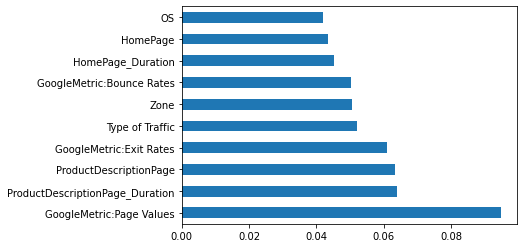

In [28]:
feature_importance = pd.Series(model.feature_importances_,index= X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

**Applying SMOTE Technique**

In [29]:
# importing SMOTE
from imblearn.over_sampling import SMOTE
# Create smot object
smote = SMOTE(sampling_strategy='minority')

# oversampling
X_smote,y_smote = smote.fit_resample(X_train, y_train)

# **Model Building**

**Adaboost Classifier**

In [30]:

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator = None,
                          n_estimators = 50,
                          learning_rate = 1.0,
                           algorithm = 'SAMME.R',
                           random_state = None
                          )

**Cross Validation**

In [31]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model,X_train,y_train, cv=20)
print('Mean Cross-Validation Score:', cv.mean())

Mean Cross-Validation Score: 0.6499523442569759


In [32]:
model.fit(X_smote,y_smote)

AdaBoostClassifier()

**Hyper Parameter Tuning**

In [33]:


model_parameter_grid = {'n_estimators': [10,80,200,800,2000,5000],
                    'learning_rate': [0.01,0.1,0.5,1]}

model_grid = RandomizedSearchCV(AdaBoostClassifier(), model_parameter_grid, n_iter=100, n_jobs=-1)

In [34]:
model_grid.fit(X_smote,y_smote)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]})

In [35]:
model_grid.best_params_

{'n_estimators': 10, 'learning_rate': 0.01}

In [36]:
model_grid.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=10)

In [37]:
model = AdaBoostClassifier(
                          n_estimators = 10,
                          learning_rate = 0.01,
                           
                          )

# cross validation

cv = cross_val_score(model,X_train,y_train, cv=20)
print('Mean Cross-Validation Score:', cv.mean())

Mean Cross-Validation Score: 0.6637269740723262


In [38]:
model.fit(X_train,y_train)  # fitting X_train and y_train into the model

AdaBoostClassifier(learning_rate=0.01, n_estimators=10)

**Prediction**

In [39]:
model_pred = model.predict(test_data)
model_pred = model_pred.astype(bool)
model_pred

array([False, False, False, ..., False, False, False])

**Submission**

In [40]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(model_pred))]
submission["Made_Purchase"]=[i for i in model_pred]
submission.to_csv('submission.csv',index=False)